In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from scipy.stats import ttest_ind
import tensorflow as tf
import random

random.seed(123)

In [ ]:
url = 'https://raw.githubusercontent.com/ow-hash/portfolio/main/Gender%20by%20Name.csv?token=GHSAT0AAAAAACQCFGRNGHGCRAAQO6MEIGEIZQCIZIA'
df = pd.read_csv(url)
df

,Name,Gender,Count,Probability
0,James,M,5304407,1.451679e-02
1,John,M,5260831,1.439753e-02
2,Robert,M,4970386,1.360266e-02
3,Michael,M,4579950,1.253414e-02
4,William,M,4226608,1.156713e-02
...,...,...,...,...
147264,Zylenn,M,1,2.736740e-09
147265,Zymeon,M,1,2.736740e-09
147266,Zyndel,M,1,2.736740e-09
147267,Zyshan,M,1,2.736740e-09


**1) Drop the 'Probability' column; it is not being used.**

**2) Change the 'Name' column to lowercase.**

In [ ]:
df = df.drop('Probability', axis=1)
df['Name'] = df['Name'].str.lower()
df

,Name,Gender,Count
0,james,M,5304407
1,john,M,5260831
2,robert,M,4970386
3,michael,M,4579950
4,william,M,4226608
...,...,...,...
147264,zylenn,M,1
147265,zymeon,M,1
147266,zyndel,M,1
147267,zyshan,M,1


**Check whether there are duplicates or not.**

In [ ]:
df.duplicated(subset=['Name', 'Gender', 'Count']).sum()

0

In [ ]:
df.duplicated(subset=['Name', 'Gender']).sum()

0

**There are no duplicates.**

**Replace any characters that are not 'a' to 'z' in the 'Name' column.**

In [ ]:
def replace_except_az(s):
    return re.sub(r'[^a-z]', ' ', s, flags=re.IGNORECASE)

df['Name'] = df['Name'].apply(lambda x: replace_except_az(x))

**Randomly check to see if there are still any special characters left.**

In [ ]:
def random_check(checking):
  print(df[df['Name'].str.contains(checking, regex=False)]['Name'].sum())


random_check(',')
random_check('.')
random_check('0')

0
0
0


**Check data information.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147269 entries, 0 to 147268
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Name    147269 non-null  object
 1   Gender  147269 non-null  object
 2   Count   147269 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.4+ MB


**There are no null values.**

**1) Create columns A to Z as features.**

**2) Count the frequency of the letters that appear in the word.**

In [ ]:
alphabet_lower = list(string.ascii_lowercase)

for i in alphabet_lower:
      df[i] = df['Name'].apply(lambda x: x.count(i)).astype(np.float16)
df

,Name,Gender,Count,a,b,c,d,e,f,g,...,q,r,s,t,u,v,w,x,y,z
0,james,M,5304407,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,john,M,5260831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,robert,M,4970386,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,michael,M,4579950,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,william,M,4226608,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147264,zylenn,M,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
147265,zymeon,M,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
147266,zyndel,M,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
147267,zyshan,M,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


**Create columns for the length of letters in the word as features.**


In [ ]:
df['num_letter'] = df['Name'].apply(len)
df

,Name,Gender,Count,a,b,c,d,e,f,g,...,r,s,t,u,v,w,x,y,z,num_letter
0,james,M,5304407,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,john,M,5260831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,robert,M,4970386,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6
3,michael,M,4579950,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,william,M,4226608,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147264,zylenn,M,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6
147265,zymeon,M,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6
147266,zyndel,M,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6
147267,zyshan,M,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6


**Check the maximum length, as I want to reduce the memory by converting to int8.**

In [ ]:
np.max(df['Name'].apply(len))

25

In [ ]:
df['num_letter'] = df['num_letter'].astype(np.int8)

**1) Create columns for the frequency of vowels in the word as features.**

**2) Change it to int8 since it should be less than the length of the word.**

In [ ]:
def count_vowels(name):
    vowels = set('aeiou')
    return sum(1 for char in name if char in vowels)

df['num_vowel'] = df['Name'].apply(count_vowels).astype(np.int8)
df

,Name,Gender,Count,a,b,c,d,e,f,g,...,s,t,u,v,w,x,y,z,num_letter,num_vowel
0,james,M,5304407,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2
1,john,M,5260831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1
2,robert,M,4970386,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6,2
3,michael,M,4579950,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,3
4,william,M,4226608,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147264,zylenn,M,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6,1
147265,zymeon,M,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6,2
147266,zyndel,M,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6,1
147267,zyshan,M,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6,1


**Plot the 'Count' column.**

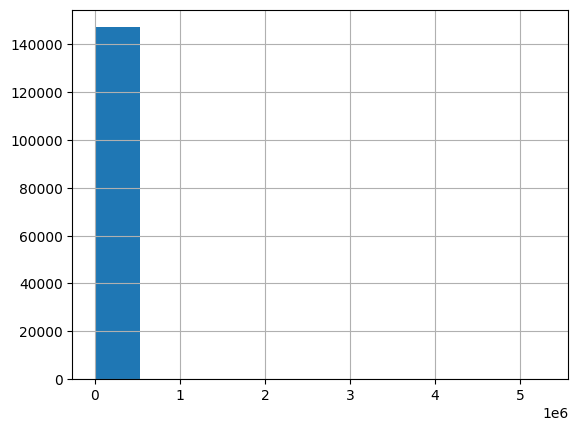

In [ ]:
import matplotlib.pyplot as plt

df['Count'].hist()
plt.show()

**There is an excess of data at low values, while there is insufficient data at high values, resulting in a skewed distribution. Transformation is needed.**

**Apply a log scale to visualize the distribution.**


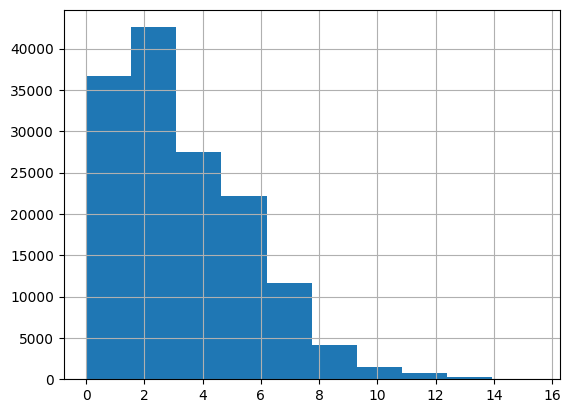

In [ ]:
df['log_count'] = df['Count'].apply(np.log).astype(np.float32)
df['log_count'].hist()
plt.show()

**I'll use Word2Vec to generate features, creating vectors of 10 values to represent each word to capture more information.**

In [ ]:
pip install gensim

In [ ]:
pip install nltk

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')


tokenized_names = [word_tokenize(name.lower()) for name in df['Name']]
model_word = Word2Vec(sentences=tokenized_names, vector_size=10, window=3, min_count=1, workers=4)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def word2vec_func(name):
    tokens = word_tokenize(name.lower())
    vectors = [model_word.wv[token] for token in tokens if token in model_word.wv]

    if not vectors:
        return [0.0] * model_word.vector_size

    return vectors[0]

df['word2vec'] = df['Name'].apply(word2vec_func)
df = pd.concat([df, df['word2vec'].apply(lambda x: pd.Series(x, index=[f'word2vec_{i+1}' for i in range(len(x))])).astype(np.float32)], axis=1)
df = df.drop('word2vec', axis = 1)
df

,Name,Gender,Count,a,b,c,d,e,f,g,...,word2vec_1,word2vec_2,word2vec_3,word2vec_4,word2vec_5,word2vec_6,word2vec_7,word2vec_8,word2vec_9,word2vec_10
0,james,M,5304407,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.103062,-0.046367,-0.007024,-0.056393,0.038229,0.027743,0.072121,0.061932,0.098536,0.093392
1,john,M,5260831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.001460,-0.088877,-0.058856,0.074719,0.032501,0.073259,0.071163,0.077759,-0.035953,-0.005883
2,robert,M,4970386,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.027475,-0.054120,0.065899,0.045031,-0.070850,-0.002555,0.008383,0.057352,-0.016987,-0.029974
3,michael,M,4579950,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.073435,-0.012918,-0.007771,-0.024511,0.096250,-0.005634,0.059775,-0.073859,-0.024906,-0.056018
4,william,M,4226608,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.098764,0.081423,0.012944,0.051544,0.013527,-0.064566,-0.013408,0.064713,-0.046039,-0.040512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147264,zylenn,M,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.099113,0.096455,-0.082425,0.034926,-0.084894,0.041789,0.073816,-0.024938,-0.052257,0.017445
147265,zymeon,M,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.051984,0.037565,-0.084961,-0.006282,0.079686,0.009869,-0.069075,-0.017885,-0.096089,-0.014129
147266,zyndel,M,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.030810,0.065777,0.023063,-0.081304,-0.010061,-0.009816,0.074655,-0.083267,-0.002485,-0.007353
147267,zyshan,M,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.094187,0.010158,0.086331,-0.028417,-0.048538,-0.077047,-0.007615,-0.079816,0.000121,-0.016724


**Encode gender Male = 1, Female  = 0, and change type to category.**

In [ ]:
df['encoded_gender'] = df['Gender'].map({'M': 1, 'F': 0}).astype('category')
df

,Name,Gender,Count,a,b,c,d,e,f,g,...,word2vec_2,word2vec_3,word2vec_4,word2vec_5,word2vec_6,word2vec_7,word2vec_8,word2vec_9,word2vec_10,encoded_gender
0,james,M,5304407,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.046367,-0.007024,-0.056393,0.038229,0.027743,0.072121,0.061932,0.098536,0.093392,1
1,john,M,5260831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.088877,-0.058856,0.074719,0.032501,0.073259,0.071163,0.077759,-0.035953,-0.005883,1
2,robert,M,4970386,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.054120,0.065899,0.045031,-0.070850,-0.002555,0.008383,0.057352,-0.016987,-0.029974,1
3,michael,M,4579950,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.012918,-0.007771,-0.024511,0.096250,-0.005634,0.059775,-0.073859,-0.024906,-0.056018,1
4,william,M,4226608,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.081423,0.012944,0.051544,0.013527,-0.064566,-0.013408,0.064713,-0.046039,-0.040512,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147264,zylenn,M,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.096455,-0.082425,0.034926,-0.084894,0.041789,0.073816,-0.024938,-0.052257,0.017445,1
147265,zymeon,M,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.037565,-0.084961,-0.006282,0.079686,0.009869,-0.069075,-0.017885,-0.096089,-0.014129,1
147266,zyndel,M,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.065777,0.023063,-0.081304,-0.010061,-0.009816,0.074655,-0.083267,-0.002485,-0.007353,1
147267,zyshan,M,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010158,0.086331,-0.028417,-0.048538,-0.077047,-0.007615,-0.079816,0.000121,-0.016724,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147269 entries, 0 to 147268
Data columns (total 43 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Name            147269 non-null  object  
 1   Gender          147269 non-null  object  
 2   Count           147269 non-null  int64   
 3   a               147269 non-null  float16 
 4   b               147269 non-null  float16 
 5   c               147269 non-null  float16 
 6   d               147269 non-null  float16 
 7   e               147269 non-null  float16 
 8   f               147269 non-null  float16 
 9   g               147269 non-null  float16 
 10  h               147269 non-null  float16 
 11  i               147269 non-null  float16 
 12  j               147269 non-null  float16 
 13  k               147269 non-null  float16 
 14  l               147269 non-null  float16 
 15  m               147269 non-null  float16 
 16  n               147269 non-null  float

**Inspect the class of label to see the class imbalance problem.**

<ipython-input-83-8e26ecb8138e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Gender', data = df, palette='pastel')


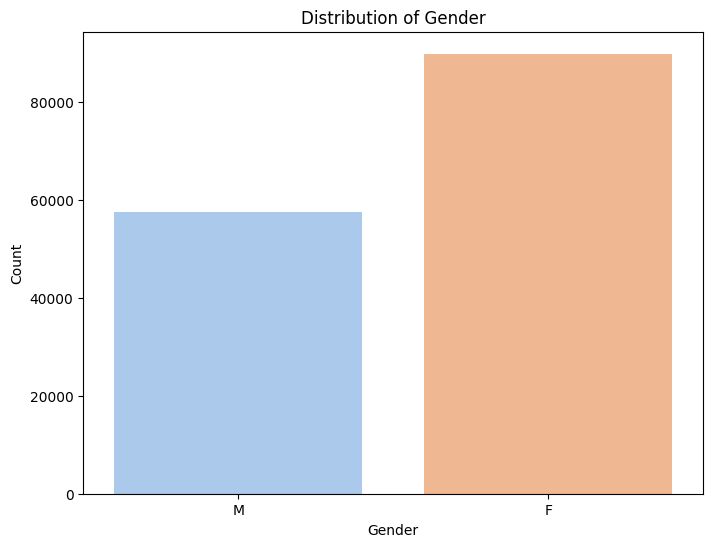

In [ ]:
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Gender', data = df, palette='pastel')

plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

In [ ]:
df['Gender'].value_counts(normalize = True)

F    0.609422
M    0.390578
Name: Gender, dtype: float64

**There isn't much of a problem.**

**Assign weights to each alphabet for feature analysis.**

In [ ]:
for i in alphabet_lower:
  df[i] = df[i] * df['log_count']
df = df.drop(['Count', 'log_count'], axis = 1)

In [ ]:
df

,Name,Gender,a,b,c,d,e,f,g,h,...,word2vec_2,word2vec_3,word2vec_4,word2vec_5,word2vec_6,word2vec_7,word2vec_8,word2vec_9,word2vec_10,encoded_gender
0,james,M,15.484049,0.000000,0.000000,0.0,15.484049,0.0,0.0,0.000000,...,-0.046367,-0.007024,-0.056393,0.038229,0.027743,0.072121,0.061932,0.098536,0.093392,1
1,john,M,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,15.475800,...,-0.088877,-0.058856,0.074719,0.032501,0.073259,0.071163,0.077759,-0.035953,-0.005883,1
2,robert,M,0.000000,15.419008,0.000000,0.0,15.419008,0.0,0.0,0.000000,...,-0.054120,0.065899,0.045031,-0.070850,-0.002555,0.008383,0.057352,-0.016987,-0.029974,1
3,michael,M,15.337198,0.000000,15.337198,0.0,15.337198,0.0,0.0,15.337198,...,-0.012918,-0.007771,-0.024511,0.096250,-0.005634,0.059775,-0.073859,-0.024906,-0.056018,1
4,william,M,15.256910,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.081423,0.012944,0.051544,0.013527,-0.064566,-0.013408,0.064713,-0.046039,-0.040512,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147264,zylenn,M,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.096455,-0.082425,0.034926,-0.084894,0.041789,0.073816,-0.024938,-0.052257,0.017445,1
147265,zymeon,M,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.037565,-0.084961,-0.006282,0.079686,0.009869,-0.069075,-0.017885,-0.096089,-0.014129,1
147266,zyndel,M,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.065777,0.023063,-0.081304,-0.010061,-0.009816,0.074655,-0.083267,-0.002485,-0.007353,1
147267,zyshan,M,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.010158,0.086331,-0.028417,-0.048538,-0.077047,-0.007615,-0.079816,0.000121,-0.016724,1


**Analyze the features.**

In [ ]:
num_of_letter = df.groupby('Gender')[alphabet_lower].mean()
num_of_letter

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
Gender,,,,,,,,,,,,,,,,,,,,,
F,3.840086,0.232006,0.429148,0.547640,2.422149,0.079756,0.177746,0.861631,1.880519,0.284539,...,0.048819,1.266883,0.920033,0.769591,0.285466,0.201909,0.077572,0.032535,0.917893,0.167912
M,2.499793,0.292449,0.452541,0.765034,1.990336,0.124002,0.222438,0.680793,1.425894,0.368448,...,0.065253,1.505802,0.859610,0.721124,0.473804,0.287029,0.145728,0.056319,0.613426,0.165710


In [ ]:
num_of_letter = num_of_letter.transpose().reset_index(names = ['Alphabet'])
num_of_letter

Gender,Alphabet,F,M
0,a,3.840086,2.499793
1,b,0.232006,0.292449
2,c,0.429148,0.452541
3,d,0.547640,0.765034
4,e,2.422149,1.990336
5,f,0.079756,0.124002
6,g,0.177746,0.222438
7,h,0.861631,0.680793
8,i,1.880519,1.425894
9,j,0.284539,0.368448


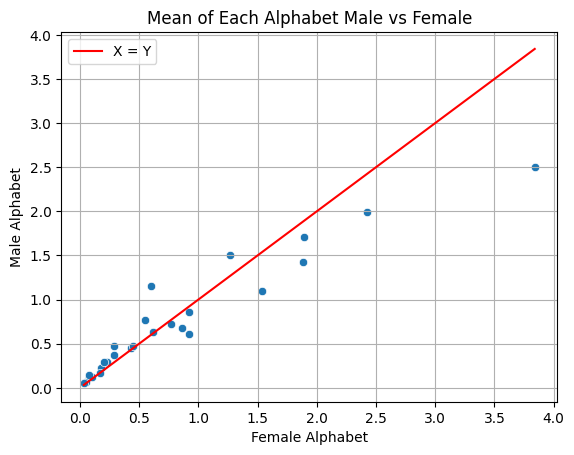

In [ ]:
plt.grid(True)
sns.scatterplot(data = num_of_letter, x='F', y='M')
sns.lineplot(data = num_of_letter, x='F', y='F', color='red', label='X = Y')


plt.xlabel('Female Alphabet')
plt.ylabel('Male Alphabet')
plt.title('Mean of Each Alphabet Male vs Female')

plt.show()

**Many alphabets deviate from the line, this might indicates that these features can be helpful in classification.**

<br>

**Above the line, the values represent males being greater than females.**

<br>

**Below the line, the values indicate that males are less than females.**

**Perform a t-test on the remaining features and plot to observe the differences.**

In [ ]:
def plot_and_ttest(df, col):

  plt.grid(True)
  ax = sns.histplot(data = df, x = col, hue = 'Gender', bins = 10, stat = 'density', alpha = 0.5)

  mean_F = df[df['Gender'] == 'F'][col].mean()
  mean_M = df[df['Gender'] == 'M'][col].mean()

  ax.axvline(x = mean_F, color = '#ff4400', linestyle='--', label = f'Mean (F): {mean_F:.2f}')
  ax.axvline(x = mean_M, color = 'blue', linestyle='--', label = f'Mean (M): {mean_M:.2f}')

  legend_labels_means = [f'Mean Female: {mean_F:.2f}', f'Mean Male: {mean_M:.2f}']
  ax.legend(labels = legend_labels_means)

  plt.xlabel(col)
  plt.show()



  t_statistic, p_value = ttest_ind(df[df['Gender'] == 'M'][col], df[df['Gender'] == 'F'][col])
  print(f'T - statistic: {t_statistic:.4f}')
  print(f'P - value: {p_value:.4f}')

  alpha = 0.05
  if p_value < alpha:
      print('The difference is statistically significant.')
  else:
      print('There is no significant difference.')


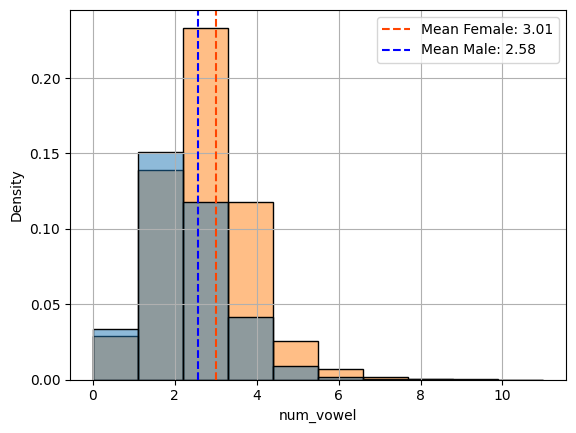

T - statistic: -79.9318
P - value: 0.0000
The difference is statistically significant.


In [ ]:
plot_and_ttest(df, 'num_vowel')

**Check the number of vowels.**

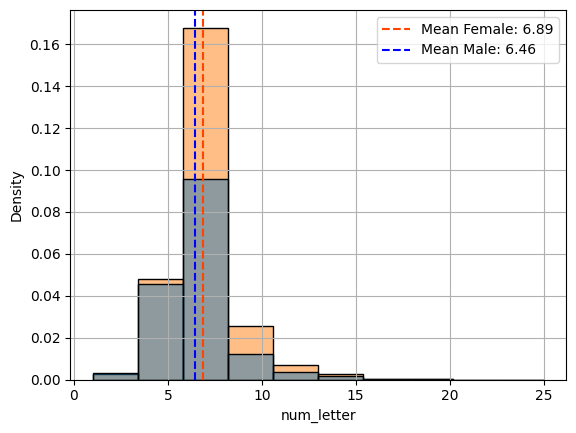

T - statistic: -43.5081
P - value: 0.0000
The difference is statistically significant.


In [ ]:
plot_and_ttest(df, 'num_letter')

**Check the number of letters.**

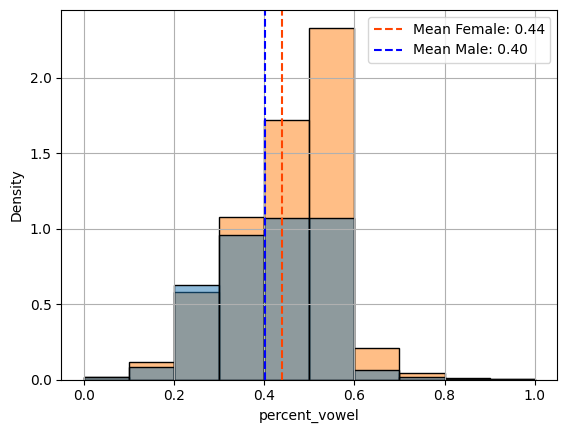

T - statistic: -63.2546
P - value: 0.0000
The difference is statistically significant.


In [ ]:
df['percent_vowel'] = df['num_vowel'] / df['num_letter']
plot_and_ttest(df, 'percent_vowel')
df.drop('percent_vowel', axis=1, inplace=True)

**Check the percentage of vowels.**

**All are statistically significant.**

**Split data for testing the last result.**

In [ ]:
from sklearn.model_selection import train_test_split

X_seen, X_unseen, y_seen, y_unseen = train_test_split(df.loc[:, df.columns != 'encoded_gender'], df['encoded_gender'], test_size=0.1, random_state=1)

In [ ]:
X_use, y_use = X_seen.iloc[:,2:], y_seen

In [ ]:
X_use

,a,b,c,d,e,f,g,h,i,j,...,word2vec_1,word2vec_2,word2vec_3,word2vec_4,word2vec_5,word2vec_6,word2vec_7,word2vec_8,word2vec_9,word2vec_10
9518,0.000000,0.0,0.0,0.000000,7.214504,0.0,0.0,0.000000,0.000000,0.0,...,0.035930,-0.006802,-0.038459,0.091624,-0.097635,-0.059783,-0.035288,-0.084762,-0.014268,-0.092671
129869,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,-0.078242,-0.064067,-0.008150,-0.089215,0.053491,-0.087699,-0.005437,-0.040226,-0.075825,0.034814
147116,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.026402,-0.003965,-0.066380,-0.073910,-0.050947,-0.095056,0.051246,0.062234,-0.035830,-0.095619
104425,3.218876,0.0,0.0,1.609438,0.000000,0.0,0.0,1.609438,1.609438,0.0,...,0.070278,-0.097970,0.061699,-0.087659,0.022375,0.024651,-0.055457,0.012561,-0.025169,0.024821
134023,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,-0.038378,0.060493,-0.030080,0.063814,-0.056816,0.055917,-0.000293,0.028146,-0.074330,0.076020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73349,5.666427,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,2.833213,0.0,...,-0.001993,-0.053144,0.028339,-0.038905,-0.042090,0.041862,-0.025785,0.048626,0.011367,0.043250
109259,0.000000,0.0,0.0,1.609438,1.609438,0.0,0.0,1.609438,0.000000,0.0,...,0.007173,0.070342,0.074973,-0.091553,0.049912,0.006958,-0.023761,-0.099650,0.003555,0.061912
50057,4.094345,0.0,0.0,0.000000,8.188689,0.0,0.0,0.000000,0.000000,0.0,...,-0.064694,-0.051701,-0.025231,0.055296,-0.021414,0.010312,-0.019068,-0.015609,0.089608,-0.008335
5192,16.265413,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,8.132707,0.0,...,-0.011413,-0.006019,-0.041807,0.066988,0.080838,0.043302,-0.085463,0.066524,-0.060434,0.055634


In [ ]:
y_use

9518      1
129869    0
147116    1
104425    0
134023    1
         ..
73349     0
109259    1
50057     0
5192      0
128037    0
Name: encoded_gender, Length: 132542, dtype: category
Categories (2, int64): [0, 1]

**Train Random Rorest 300 trees.**



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


X_train, X_test, y_train, y_test = train_test_split(X_use, y_use, test_size=0.2, random_state=2)


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(class_weight='balanced', n_estimators = 300))
])


param_dist = {
    'classifier__max_depth': [40, 50],
    'classifier__min_samples_split': [7, 10],
    'classifier__min_samples_leaf': [5, 10, 15]
}

random_search = RandomizedSearchCV(pipeline, param_dist, cv = 2, scoring = 'accuracy', n_iter=10, random_state=42, n_jobs=-1, verbose=1, error_score='raise')

random_search.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, error_score='raise',
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('classifier',
                                              RandomForestClassifier(class_weight='balanced',
                                                                     n_estimators=300))]),
                   n_jobs=-1,
                   param_distributions={'classifier__max_depth': [40, 50],
                                        'classifier__min_samples_leaf': [5, 10,
                                                                         15],
                                        'classifier__min_samples_split': [7,
                                                                          10]},
                   random_state=42, scoring='accuracy', verbose=1)

**See the Random Forest results.**

In [ ]:
from sklearn.metrics import accuracy_score


print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Best Parameters: {'classifier__min_samples_split': 7, 'classifier__min_samples_leaf': 10, 'classifier__max_depth': 50}
Best Accuracy: 0.6753840708635075


**Analyze the feature importances.**

In [ ]:
best_estimator = random_search.best_estimator_
feature_importances = best_estimator.named_steps['classifier'].feature_importances_
feature_importances

array([0.06420185, 0.00472885, 0.0057295 , 0.01686629, 0.02598467,
       0.00125445, 0.0025555 , 0.01519651, 0.02723153, 0.01035846,
       0.00778139, 0.03000391, 0.01232734, 0.0248502 , 0.0513411 ,
       0.00158152, 0.00218092, 0.02193731, 0.01338556, 0.01182224,
       0.02136485, 0.00766225, 0.00325726, 0.00087764, 0.04186161,
       0.00355613, 0.04179599, 0.12106507, 0.04059047, 0.04036664,
       0.04098864, 0.04103698, 0.0403118 , 0.04101904, 0.04090635,
       0.04043205, 0.04065378, 0.04093435])

In [ ]:
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
27,num_vowel,0.121065
0,a,0.064202
14,o,0.051341
24,y,0.041862
26,num_letter,0.041796
31,word2vec_4,0.041037
33,word2vec_6,0.041019
30,word2vec_3,0.040989
37,word2vec_10,0.040934
34,word2vec_7,0.040906


**Collect the results of the Random Forest.**

In [ ]:
predictions = random_search.predict(X_unseen.iloc[:,2:])

df_result = pd.DataFrame()
df_result['encoded_gender'] = X_unseen['Gender'].map({'M': 1, 'F': 0})
df_result = df_result.reset_index(drop=True)
df_result['forest_pred'] = (predictions >= 0.5).astype(int)
df_result

,encoded_gender,forest_pred
0,1,0
1,0,1
2,1,1
3,0,1
4,1,1
...,...,...
14722,0,0
14723,0,0
14724,0,0
14725,0,0


**Test on unseen data.**

In [ ]:
(df_result['encoded_gender'] == df_result['forest_pred']).sum()/df_result.shape[0]

0.6815373124193658

In [ ]:
#import joblib

#joblib.dump(pipeline, "rf_model_gender.pkl")

In [ ]:
#loaded_pipeline = joblib.load("rf_model_gender.pkl")


**Train the neural network model.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dense, Dropout, SimpleRNN
from keras.models import Sequential


X_train, X_test, y_train, y_test = train_test_split(X_use, y_use, test_size=0.2, random_state=2)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


nn_model = Sequential()
nn_model.add(Dense(128, activation="relu", input_dim=X_train_scaled.shape[1]))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(64, activation="relu"))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(32, activation="relu"))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(16, activation="relu"))
nn_model.add(Dropout(0.2))

nn_model.add(Dense(1, activation="sigmoid"))


nn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

nn_model.fit(X_train_scaled, y_train, epochs = 15, batch_size = 200, validation_split = 0.2)

Epoch 1/15
425/425 [==============================] - 6s 8ms/step - loss: 0.6312 - accuracy: 0.6383 - val_loss: 0.5957 - val_accuracy: 0.6751
Epoch 2/15
425/425 [==============================] - 2s 5ms/step - loss: 0.6025 - accuracy: 0.6729 - val_loss: 0.5881 - val_accuracy: 0.6817
Epoch 3/15
425/425 [==============================] - 2s 5ms/step - loss: 0.5958 - accuracy: 0.6775 - val_loss: 0.5868 - val_accuracy: 0.6848
Epoch 4/15
425/425 [==============================] - 3s 6ms/step - loss: 0.5908 - accuracy: 0.6818 - val_loss: 0.5835 - val_accuracy: 0.6848
Epoch 5/15
425/425 [==============================] - 2s 5ms/step - loss: 0.5875 - accuracy: 0.6843 - val_loss: 0.5795 - val_accuracy: 0.6869
Epoch 6/15
425/425 [==============================] - 2s 5ms/step - loss: 0.5847 - accuracy: 0.6850 - val_loss: 0.5787 - val_accuracy: 0.6867
Epoch 7/15
425/425 [==============================] - 2s 5ms/step - loss: 0.5814 - accuracy: 0.6862 - val_loss: 0.5766 - val_accuracy: 0.6886
Epoch 

**Collect the results of the Neural Networks.**

In [ ]:
predictions = nn_model.predict(X_unseen.iloc[:,2:])

df_result['nn_pred'] = (predictions >= 0.5).astype(int)

461/461 [==============================] - 1s 1ms/step


In [ ]:
(df_result['encoded_gender'] == df_result['nn_pred']).sum()/df_result.shape[0]

0.6126162830175867

In [ ]:
#import joblib
#joblib.dump(nn_model, "nn_model_gender.pkl")

['nn_model_gender.pkl']

**Due to the nature of the data being sequences, using a model that can capture sequences might be more appropriate.**

**Data Preprecessing for RNN.**

In [ ]:
def preprocess_data(names, genders):

    unique_characters = set(''.join(names))
    print(unique_characters)

    max_length = max(len(name) for name in names)
    print(max_length)

    char_to_index = {char: i for i, char in enumerate(unique_characters)}
    print(char_to_index)

    X = np.zeros((len(names), max_length, len(unique_characters)), dtype=np.float32)
    y = np.array(genders, dtype=np.float32)

    for i, name in enumerate(names):
        for t, char in enumerate(name):
            X[i, t, char_to_index[char]] = 1

    return X, y

In [ ]:
names_s_rnn, genders_s_rnn = X_seen['Name'], y_seen

X_s_rnn, y_s_rnn = preprocess_data(names_s_rnn, genders_s_rnn)
X_s_rnn.shape

{'u', 'i', 'v', 'k', 'c', 't', 'n', 'r', ' ', 's', 'l', 'd', 'f', 'a', 'b', 'm', 'q', 'h', 'j', 'p', 'g', 'x', 'o', 'e', 'y', 'w', 'z'}
24
{'u': 0, 'i': 1, 'v': 2, 'k': 3, 'c': 4, 't': 5, 'n': 6, 'r': 7, ' ': 8, 's': 9, 'l': 10, 'd': 11, 'f': 12, 'a': 13, 'b': 14, 'm': 15, 'q': 16, 'h': 17, 'j': 18, 'p': 19, 'g': 20, 'x': 21, 'o': 22, 'e': 23, 'y': 24, 'w': 25, 'z': 26}


(132542, 24, 27)

**Train and hyperparameter tuning on RNN.**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout, LSTM


X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_s_rnn, y_s_rnn, test_size=0.2, random_state=42)


rnn_model = Sequential()
rnn_model.add(SimpleRNN(32, activation="relu", input_shape=(X_s_rnn.shape[1], X_s_rnn.shape[2])))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(32, activation="relu"))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(32, activation="relu"))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(1, activation="sigmoid"))

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


rnn_model.fit(X_train_rnn, y_train_rnn, epochs=5, batch_size=30, validation_split=0.2)


accuracy = rnn_model.evaluate(X_test_rnn, y_test_rnn)[1]
print(f"Test Accuracy: {accuracy}")

Epoch 1/5
2828/2828 [==============================] - 22s 7ms/step - loss: 0.5262 - accuracy: 0.7477 - val_loss: 0.4871 - val_accuracy: 0.7682
Epoch 2/5
2828/2828 [==============================] - 19s 7ms/step - loss: 0.4908 - accuracy: 0.7757 - val_loss: 0.4880 - val_accuracy: 0.7804
Epoch 3/5
2828/2828 [==============================] - 19s 7ms/step - loss: 0.4876 - accuracy: 0.7782 - val_loss: 0.4838 - val_accuracy: 0.7812
Epoch 4/5
2828/2828 [==============================] - 21s 7ms/step - loss: 0.4792 - accuracy: 0.7822 - val_loss: 0.4867 - val_accuracy: 0.7802
Epoch 5/5
829/829 [==============================] - 3s 3ms/step - loss: 0.4757 - accuracy: 0.7835
Test Accuracy: 0.7835074663162231


**Test on unseen data.**

In [ ]:
names_un_rnn, genders_un_rnn = X_unseen['Name'].copy(), y_unseen.copy()

In [ ]:
X_un_rnn, y_un_rnn = preprocess_data(names_un_rnn, genders_un_rnn)

{'u', 'i', 'v', 'k', 'c', 't', 'n', 'r', ' ', 's', 'l', 'd', 'f', 'a', 'b', 'm', 'q', 'h', 'j', 'p', 'g', 'x', 'o', 'e', 'y', 'w', 'z'}
25
{'u': 0, 'i': 1, 'v': 2, 'k': 3, 'c': 4, 't': 5, 'n': 6, 'r': 7, ' ': 8, 's': 9, 'l': 10, 'd': 11, 'f': 12, 'a': 13, 'b': 14, 'm': 15, 'q': 16, 'h': 17, 'j': 18, 'p': 19, 'g': 20, 'x': 21, 'o': 22, 'e': 23, 'y': 24, 'w': 25, 'z': 26}


In [ ]:
names_un_rnn[names_un_rnn.apply(len) > 24]

135869    carmelo antonio francesco
Name: Name, dtype: object

**We will truncate the longer sequence in unseen data, since it has only 1 obsevation.**

In [ ]:
names_un_rnn = names_un_rnn.apply(lambda x: x[:24] if len(x) > 24 else x)
X_un_rnn, y_un_rnn = preprocess_data(names_un_rnn, genders_un_rnn)

{'u', 'i', 'v', 'k', 'c', 't', 'n', 'r', ' ', 's', 'l', 'd', 'f', 'a', 'b', 'm', 'q', 'h', 'j', 'p', 'g', 'x', 'o', 'e', 'y', 'w', 'z'}
24
{'u': 0, 'i': 1, 'v': 2, 'k': 3, 'c': 4, 't': 5, 'n': 6, 'r': 7, ' ': 8, 's': 9, 'l': 10, 'd': 11, 'f': 12, 'a': 13, 'b': 14, 'm': 15, 'q': 16, 'h': 17, 'j': 18, 'p': 19, 'g': 20, 'x': 21, 'o': 22, 'e': 23, 'y': 24, 'w': 25, 'z': 26}


**Collect the results of the RNN.**

In [ ]:
rnn_predictions = rnn_model.predict(X_un_rnn)

df_result['rnn_pred'] = (rnn_predictions >= 0.5).astype(int)

461/461 [==============================] - 1s 3ms/step


In [ ]:
(df_result['encoded_gender'] == df_result['rnn_pred']).sum()/df_result.shape[0]

0.7930332043185985

In [ ]:
#import joblib
#joblib.dump(rnn_model, "rnn_model_gender.pkl")

**Preprocess for LSTM.**

In [ ]:
names_s_lstm, genders_s_lstm = X_seen['Name'].copy(), y_seen.copy()
X_s_lstm, y_s_lstm = preprocess_data(names_s_lstm, genders_s_lstm)
X_s_lstm.shape

{'u', 'i', 'v', 'k', 'c', 't', 'n', 'r', ' ', 's', 'l', 'd', 'f', 'a', 'b', 'm', 'q', 'h', 'j', 'p', 'g', 'x', 'o', 'e', 'y', 'w', 'z'}
24
{'u': 0, 'i': 1, 'v': 2, 'k': 3, 'c': 4, 't': 5, 'n': 6, 'r': 7, ' ': 8, 's': 9, 'l': 10, 'd': 11, 'f': 12, 'a': 13, 'b': 14, 'm': 15, 'q': 16, 'h': 17, 'j': 18, 'p': 19, 'g': 20, 'x': 21, 'o': 22, 'e': 23, 'y': 24, 'w': 25, 'z': 26}


(132542, 24, 27)

**Train an LSTM model and perform hyperparameter tuning.**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout, LSTM, Embedding


X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_s_lstm, y_s_lstm, test_size=0.2, random_state=42)


lstm_model = Sequential()
lstm_model.add(LSTM(32, activation="relu", input_shape=(X_s_lstm.shape[1], X_s_lstm.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(32, activation="relu"))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(32, activation="relu"))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation="sigmoid"))


lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


lstm_model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=50, validation_split=0.2)


accuracy = lstm_model.evaluate(X_test_lstm, y_test_lstm)[1]
print(f"Test Accuracy: {accuracy}")

Epoch 1/10
1697/1697 [==============================] - 26s 14ms/step - loss: 0.5473 - accuracy: 0.7218 - val_loss: 0.4856 - val_accuracy: 0.7692
Epoch 2/10
1697/1697 [==============================] - 23s 13ms/step - loss: 0.4827 - accuracy: 0.7745 - val_loss: 0.4814 - val_accuracy: 0.7766
Epoch 3/10
1697/1697 [==============================] - 22s 13ms/step - loss: 0.4720 - accuracy: 0.7804 - val_loss: 0.4591 - val_accuracy: 0.7851
Epoch 4/10
1697/1697 [==============================] - 22s 13ms/step - loss: 0.4661 - accuracy: 0.7846 - val_loss: 0.4631 - val_accuracy: 0.7817
Epoch 5/10
1697/1697 [==============================] - 23s 14ms/step - loss: 0.4600 - accuracy: 0.7874 - val_loss: 0.4514 - val_accuracy: 0.7884
Epoch 6/10
1697/1697 [==============================] - 23s 13ms/step - loss: 0.4576 - accuracy: 0.7883 - val_loss: 0.4589 - val_accuracy: 0.7845
Epoch 7/10
1697/1697 [==============================] - 23s 14ms/step - loss: 0.4529 - accuracy: 0.7912 - val_loss: 0.4542 -

In [ ]:
names_un_lstm, genders_un_lstm = X_unseen['Name'].copy(), y_unseen.copy()
X_us_lstm, y_us_lstm = preprocess_data(names_un_lstm, genders_un_lstm)

{'u', 'i', 'v', 'k', 'c', 't', 'n', 'r', ' ', 's', 'l', 'd', 'f', 'a', 'b', 'm', 'q', 'h', 'j', 'p', 'g', 'x', 'o', 'e', 'y', 'w', 'z'}
25
{'u': 0, 'i': 1, 'v': 2, 'k': 3, 'c': 4, 't': 5, 'n': 6, 'r': 7, ' ': 8, 's': 9, 'l': 10, 'd': 11, 'f': 12, 'a': 13, 'b': 14, 'm': 15, 'q': 16, 'h': 17, 'j': 18, 'p': 19, 'g': 20, 'x': 21, 'o': 22, 'e': 23, 'y': 24, 'w': 25, 'z': 26}


In [ ]:
names_un_lstm = names_un_lstm.apply(lambda x: x[:24] if len(x) > 24 else x)
X_us_lstm, y_un_lstm = preprocess_data(names_un_lstm, genders_un_lstm)

lstm_predictions = lstm_model.predict(X_us_lstm)

df_result['lstm_pred'] = (lstm_predictions >= 0.5).astype(int)

{'u', 'i', 'v', 'k', 'c', 't', 'n', 'r', ' ', 's', 'l', 'd', 'f', 'a', 'b', 'm', 'q', 'h', 'j', 'p', 'g', 'x', 'o', 'e', 'y', 'w', 'z'}
24
{'u': 0, 'i': 1, 'v': 2, 'k': 3, 'c': 4, 't': 5, 'n': 6, 'r': 7, ' ': 8, 's': 9, 'l': 10, 'd': 11, 'f': 12, 'a': 13, 'b': 14, 'm': 15, 'q': 16, 'h': 17, 'j': 18, 'p': 19, 'g': 20, 'x': 21, 'o': 22, 'e': 23, 'y': 24, 'w': 25, 'z': 26}
461/461 [==============================] - 2s 4ms/step


In [ ]:
(df_result['encoded_gender'] == df_result['lstm_pred']).sum()/df_result.shape[0]

0.8023358457255382

In [ ]:
#import joblib
#joblib.dump(lstm_model, "lstm_model_gender.pkl")

In [ ]:
df_conclude = df_result[['encoded_gender','forest_pred', 'nn_pred', 'rnn_pred', 'lstm_pred']]
df_conclude

,encoded_gender,forest_pred,nn_pred,rnn_pred,lstm_pred
0,1,0,1,1,1
1,0,1,0,0,0
2,1,1,1,0,0
3,0,1,1,0,0
4,1,1,1,1,1
...,...,...,...,...,...
14722,0,0,0,0,0
14723,0,0,0,0,0
14724,0,0,0,0,0
14725,0,0,0,0,0


In [ ]:
def acc(col):
  print((df_conclude['encoded_gender'] == df_conclude[col]).sum()/df_conclude.shape[0])

In [ ]:
acc('forest_pred')
acc('nn_pred')
acc('rnn_pred')
acc('lstm_pred')

0.6815373124193658
0.6126162830175867
0.7930332043185985
0.8023358457255382


**Result**

**1) LSTM**

Conclusion: Achieves the best performance (80%) but consumes a significant amount of resources.

**2) RNN**

Conclusion: Experiences gradient problems when using around 36 nodes or more, but performs close to LSTM (79%).

**3) Random Forest**

Conclusion: Outperforms guessing by a small margin (68% compared to the guessing from class 60%), but still surpasses neural networks.


**4.) Neural Networks**

Conclusion: Cannot confidently say that it is outperform guessing (61%).


**Ensemble LSTM and RNN by averaging probability predictions.**

In [ ]:
df_conclude['mean_ensemble'] = (((lstm_predictions + rnn_predictions) / 2) >= 0.5).astype(int)

In [ ]:
acc('mean_ensemble')

0.8044408229782033


**From ensemble can increase from 80.23% to 80.44%.**

**For a deeper understanding of dataset, extract the unisex names.**

In [ ]:
df_dup = df[df.duplicated(subset=['Name'], keep=False)]
df_dup

,Name,Gender,a,b,c,d,e,f,g,h,...,word2vec_2,word2vec_3,word2vec_4,word2vec_5,word2vec_6,word2vec_7,word2vec_8,word2vec_9,word2vec_10,encoded_gender
0,james,M,15.484049,0.000000,0.000000,0.0,15.484049,0.0,0.0,0.000000,...,-0.046367,-0.007024,-0.056393,0.038229,0.027743,0.072121,0.061932,0.098536,0.093392,1
1,john,M,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,15.475800,...,-0.088877,-0.058856,0.074719,0.032501,0.073259,0.071163,0.077759,-0.035953,-0.005883,1
2,robert,M,0.000000,15.419008,0.000000,0.0,15.419008,0.0,0.0,0.000000,...,-0.054120,0.065899,0.045031,-0.070850,-0.002555,0.008383,0.057352,-0.016987,-0.029974,1
3,michael,M,15.337198,0.000000,15.337198,0.0,15.337198,0.0,0.0,15.337198,...,-0.012918,-0.007771,-0.024511,0.096250,-0.005634,0.059775,-0.073859,-0.024906,-0.056018,1
4,william,M,15.256910,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.081423,0.012944,0.051544,0.013527,-0.064566,-0.013408,0.064713,-0.046039,-0.040512,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147222,ziyuan,M,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,-0.003744,-0.044249,0.012885,-0.014550,0.095855,-0.011461,-0.089447,0.059122,-0.013658,1
147224,zlata,M,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.019030,0.008497,0.046447,-0.097358,0.045856,-0.015551,0.094387,0.094353,0.048724,1
147243,zowie,M,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,-0.079897,-0.060204,-0.039143,-0.030813,0.059193,-0.090228,-0.051737,0.089654,0.086528,1
147246,zozo,M,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,-0.076531,-0.082263,-0.007717,-0.060132,0.080725,0.007716,0.028786,-0.091579,-0.018525,1


In [ ]:
(df_dup.shape[0])/(df.shape[0])

0.18193238223930358

In [ ]:
df_dup[df_dup['Name'] == 'robert']

,Name,Gender,a,b,c,d,e,f,g,h,...,word2vec_2,word2vec_3,word2vec_4,word2vec_5,word2vec_6,word2vec_7,word2vec_8,word2vec_9,word2vec_10,encoded_gender
2,robert,M,0.0,15.419008,0.0,0.0,15.419008,0.0,0.0,0.0,...,-0.05412,0.065899,0.045031,-0.07085,-0.002555,0.008383,0.057352,-0.016987,-0.029974,1
1743,robert,F,0.0,9.932318,0.0,0.0,9.932318,0.0,0.0,0.0,...,-0.05412,0.065899,0.045031,-0.07085,-0.002555,0.008383,0.057352,-0.016987,-0.029974,0


**So we have 18.19% that the names are unisex.**

**This type of data can only be predicted based on other factors.**

**Try to see, if we use only gender-specific names.**

In [ ]:
df = df.drop_duplicates(subset=['Name'], keep = False)
print((df['Name'] =='robert').sum())
df = df.reset_index(drop = True)
df

0


,Name,Gender,a,b,c,d,e,f,g,h,...,word2vec_2,word2vec_3,word2vec_4,word2vec_5,word2vec_6,word2vec_7,word2vec_8,word2vec_9,word2vec_10,encoded_gender
0,delilah,F,10.615849,0.000000,0.0,10.615849,10.615849,0.0,0.0,10.615849,...,0.012280,-0.067496,-0.046734,0.023852,0.060909,-0.011348,-0.089107,-0.071273,0.088838,0
1,brielle,F,0.000000,10.446393,0.0,0.000000,20.892786,0.0,0.0,0.000000,...,-0.098434,0.047031,-0.041126,0.007727,-0.047463,0.042448,-0.048508,-0.096854,-0.053611,0
2,helene,F,0.000000,0.000000,0.0,0.000000,31.241470,0.0,0.0,10.413823,...,-0.082188,0.081611,0.004425,-0.018392,-0.038376,0.049354,-0.037023,-0.028974,0.071790,0
3,alina,F,20.779652,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.023911,0.030826,-0.023065,-0.095984,-0.082884,0.079908,0.044376,-0.000899,-0.096702,0
4,jakob,M,10.381243,10.381243,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.025087,-0.079824,0.092616,-0.028288,-0.089258,0.050632,0.004284,0.017544,-0.049048,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120471,zylenn,M,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.096455,-0.082425,0.034926,-0.084894,0.041789,0.073816,-0.024938,-0.052257,0.017445,1
120472,zymeon,M,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.037565,-0.084961,-0.006282,0.079686,0.009869,-0.069075,-0.017885,-0.096089,-0.014129,1
120473,zyndel,M,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.065777,0.023063,-0.081304,-0.010061,-0.009816,0.074655,-0.083267,-0.002485,-0.007353,1
120474,zyshan,M,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.010158,0.086331,-0.028417,-0.048538,-0.077047,-0.007615,-0.079816,0.000121,-0.016724,1


**Test new data on LSTM.**

In [ ]:
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(df['Name'], df['encoded_gender'], test_size=0.2, random_state=42)
X_train_pre, y_train_pre = preprocess_data(X_train_lstm, y_train_lstm)
X_train_pre.shape[1]

{'u', 'i', 'v', 'k', 'c', 't', 'n', 'r', ' ', 's', 'l', 'd', 'f', 'a', 'b', 'm', 'q', 'j', 'h', 'p', 'g', 'x', 'o', 'e', 'y', 'w', 'z'}
25
{'u': 0, 'i': 1, 'v': 2, 'k': 3, 'c': 4, 't': 5, 'n': 6, 'r': 7, ' ': 8, 's': 9, 'l': 10, 'd': 11, 'f': 12, 'a': 13, 'b': 14, 'm': 15, 'q': 16, 'j': 17, 'h': 18, 'p': 19, 'g': 20, 'x': 21, 'o': 22, 'e': 23, 'y': 24, 'w': 25, 'z': 26}


25

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout, LSTM, Embedding


X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(df['Name'], df['encoded_gender'], test_size=0.2, random_state=42)
X_train_pre, y_train_pre = preprocess_data(X_train_lstm, y_train_lstm)


X_test_lstm = X_test_lstm.apply(lambda x: x[:X_train_pre.shape[1]] if len(x) > X_train_pre.shape[1] else x)
X_test_pre, y_test_pre = preprocess_data(X_test_lstm, y_test_lstm)


lstm_model = Sequential()
lstm_model.add(LSTM(32, activation="relu", input_shape=(X_train_pre.shape[1], X_train_pre.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(32, activation="relu"))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(32, activation="relu"))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation="sigmoid"))


lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lstm_model.fit(X_train_pre, y_train_pre, epochs=15, batch_size=50, validation_split=0.2)

accuracy = lstm_model.evaluate(X_test_pre, y_test_pre)[1]
print(f"Test Accuracy: {accuracy}")

{'u', 'i', 'v', 'k', 'c', 't', 'n', 'r', ' ', 's', 'l', 'd', 'f', 'a', 'b', 'm', 'q', 'j', 'h', 'p', 'g', 'x', 'o', 'e', 'y', 'w', 'z'}
25
{'u': 0, 'i': 1, 'v': 2, 'k': 3, 'c': 4, 't': 5, 'n': 6, 'r': 7, ' ': 8, 's': 9, 'l': 10, 'd': 11, 'f': 12, 'a': 13, 'b': 14, 'm': 15, 'q': 16, 'j': 17, 'h': 18, 'p': 19, 'g': 20, 'x': 21, 'o': 22, 'e': 23, 'y': 24, 'w': 25, 'z': 26}
{'u', 'i', 'v', 'k', 'c', 't', 'n', 'r', ' ', 's', 'l', 'd', 'f', 'a', 'b', 'm', 'q', 'h', 'j', 'p', 'g', 'x', 'o', 'e', 'y', 'w', 'z'}
23
{'u': 0, 'i': 1, 'v': 2, 'k': 3, 'c': 4, 't': 5, 'n': 6, 'r': 7, ' ': 8, 's': 9, 'l': 10, 'd': 11, 'f': 12, 'a': 13, 'b': 14, 'm': 15, 'q': 16, 'h': 17, 'j': 18, 'p': 19, 'g': 20, 'x': 21, 'o': 22, 'e': 23, 'y': 24, 'w': 25, 'z': 26}
Epoch 1/15
1543/1543 [==============================] - 24s 14ms/step - loss: 0.4838 - accuracy: 0.7709 - val_loss: 0.3749 - val_accuracy: 0.8415
Epoch 2/15
1543/1543 [==============================] - 21s 13ms/step - loss: 0.3871 - accuracy: 0.8382 - va

**From 80.44 % => 83.35%.**